/tmp/ipykernel_8363/2064850883.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  souvenir_data['date'] = pd.date_range(start='2000-01-01', periods=len(souvenir_data), freq='M')


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=2.38 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-2.617, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-14.516, Time=0.14 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-12.473, Time=0.24 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=39.926, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=-13.505, Time=0.05 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=-12.859, Time=0.33 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=-16.116, Time=0.14 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=0.91 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=-22.171, Time=0.25 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=-17.151, Time=0.08 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.

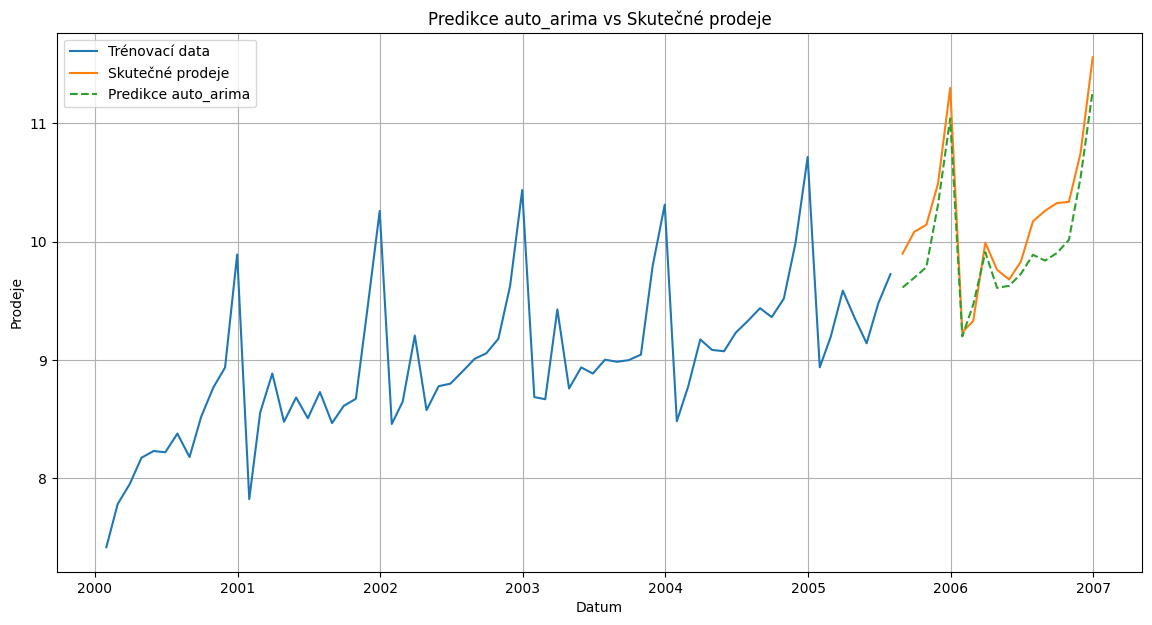

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose

# Načtení dat
data_path = '../souvenirtimeseries.csv'
souvenir_data = pd.read_csv(data_path)
souvenir_data.columns = ['month', 'sales']
souvenir_data['date'] = pd.date_range(start='2000-01-01', periods=len(souvenir_data), freq='M')
souvenir_data.set_index('date', inplace=True)
souvenir_data.drop('month', axis=1, inplace=True)

# logaritmická transformace
souvenir_data['sales'] = np.log(souvenir_data['sales'])

# Rozdělení dat
split_point = int(len(souvenir_data) * 0.8)
train_data, test_data = souvenir_data.iloc[:split_point], souvenir_data.iloc[split_point:]

# Použití auto_arima k nalezení nejlepšího modelu
auto_arima_model = auto_arima(train_data['sales'], seasonal=True, m=12, stepwise=True,
                              suppress_warnings=True, D=1, trace=True, error_action='ignore', max_order=None,
                              out_of_sample_size=10)

# Sumarizace modelu
print(auto_arima_model.summary())

# Predikce na testovacích datech
arima_predictions = auto_arima_model.predict(n_periods=len(test_data))

# Vykreslení predikcí a skutečných prodejů
plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data['sales'], label='Trénovací data')
plt.plot(test_data.index, test_data['sales'], label='Skutečné prodeje')
plt.plot(test_data.index, arima_predictions, label='Predikce auto_arima', linestyle='--')
plt.title('Predikce auto_arima vs Skutečné prodeje')
plt.xlabel('Datum')
plt.ylabel('Prodeje')
plt.legend()
plt.grid(True)
plt.show()


/tmp/ipykernel_41648/2456171548.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  souvenir_data['date'] = pd.date_range(start='2000-01-01', periods=len(souvenir_data), freq='M')


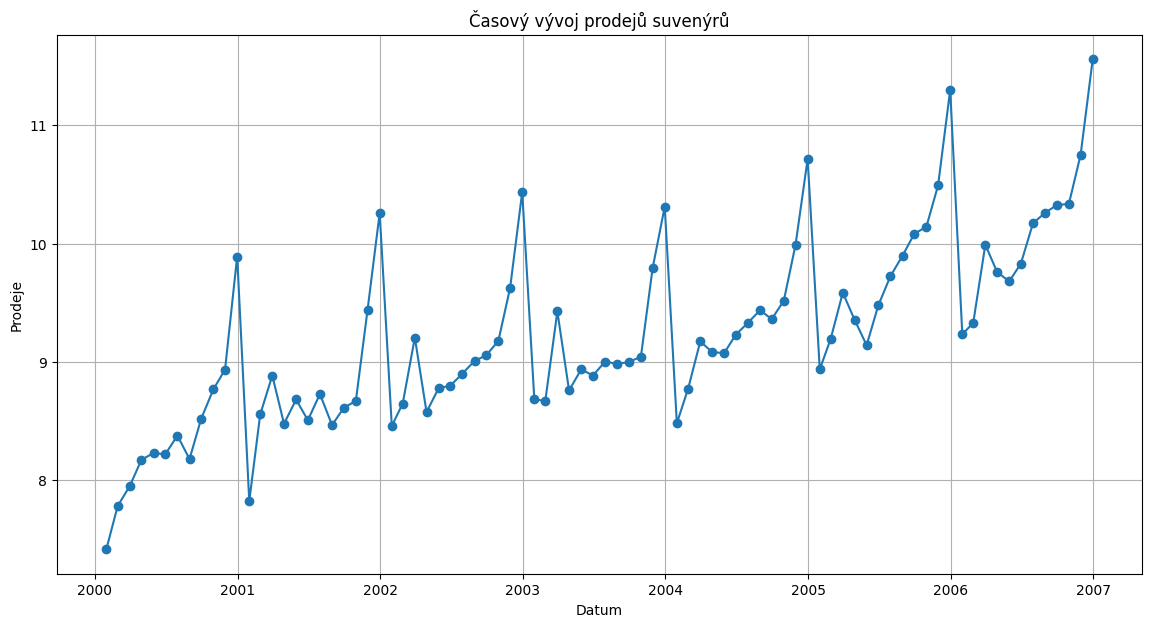

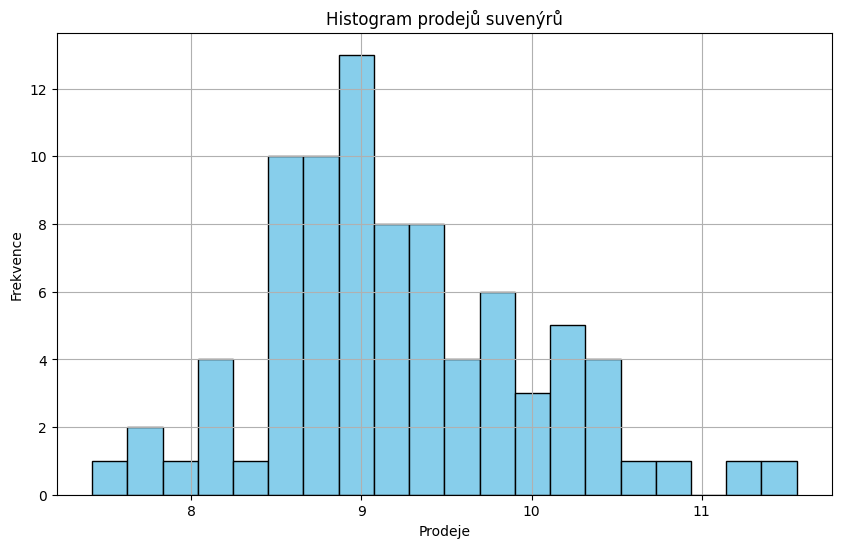

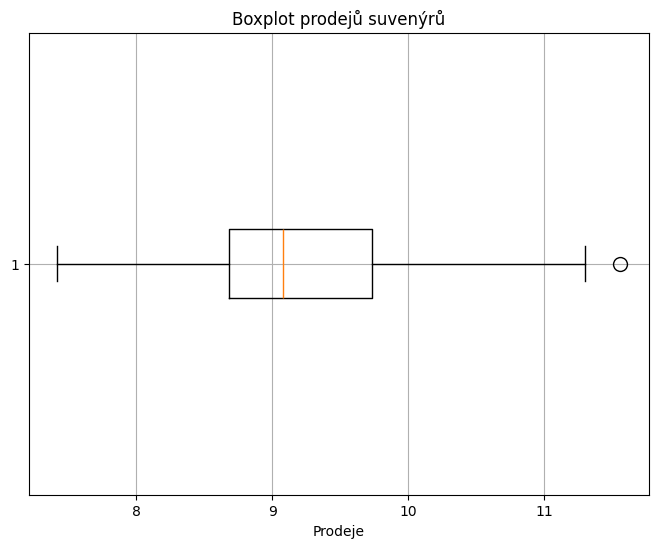

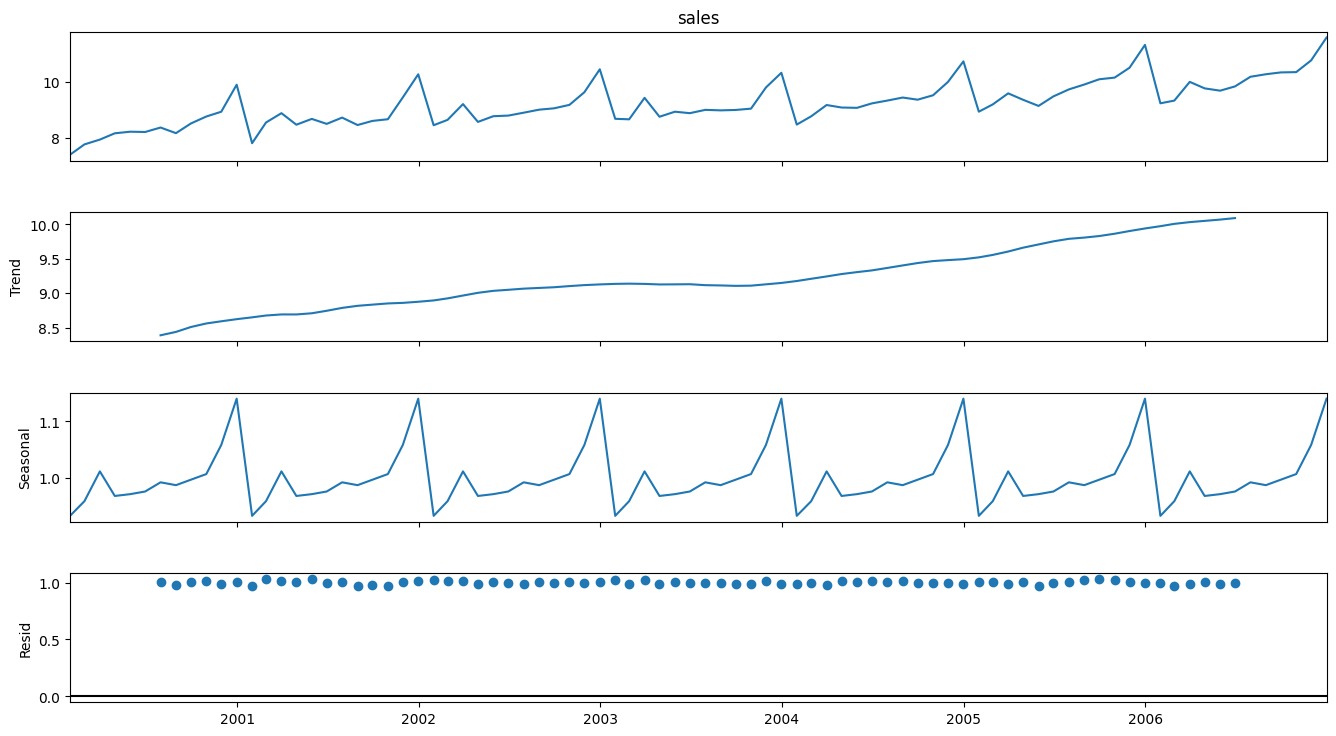

/home/petka/PROJECTS/KMA-SZZ/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


RMSE for Holt-Winters model: 0.24915723529780334
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=4.61 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-2.617, Time=0.08 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-14.516, Time=0.69 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-12.473, Time=1.00 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=39.926, Time=0.04 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=-13.505, Time=0.11 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=-12.859, Time=1.41 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=2.04 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=-16.116, Time=0.75 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=inf, Time=2.68 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=3.40 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=-22.171, Time=1.00 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=-17.151, Time=0.18 sec
 ARIMA

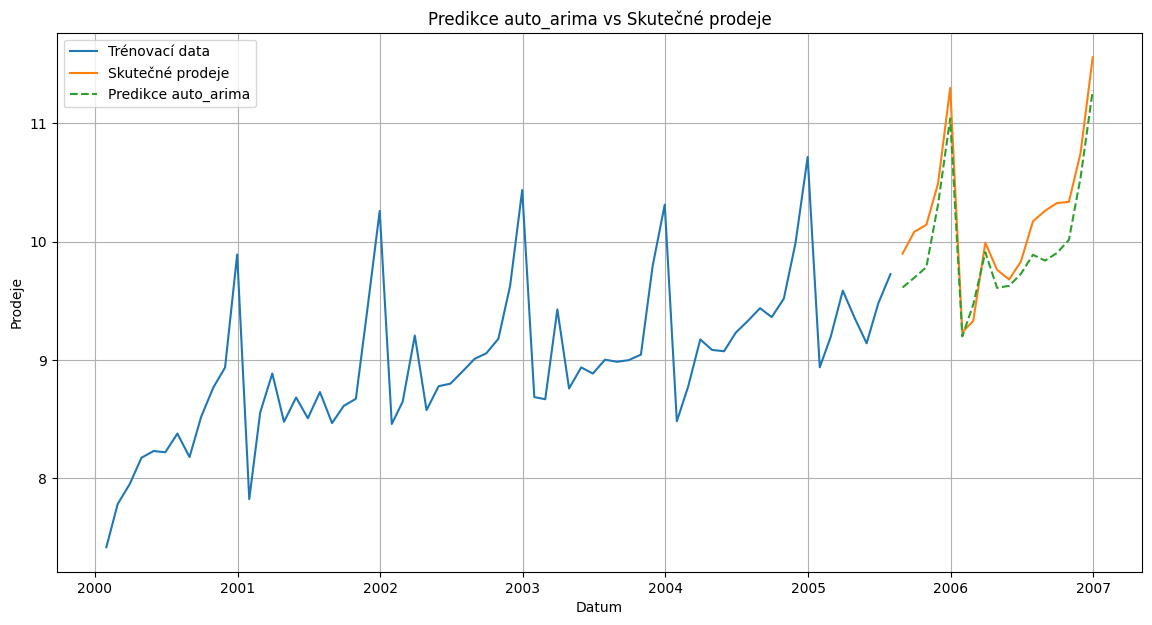

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Function to load and preprocess data
def load_and_preprocess(data_path):
    souvenir_data = pd.read_csv(data_path)
    souvenir_data['date'] = pd.date_range(start='2000-01-01', periods=len(souvenir_data), freq='M')
    souvenir_data.set_index('date', inplace=True)
    # souvenir_data.drop(['month'], axis=1, inplace=True)
    # Log transformation to stabilize variance
    souvenir_data['sales'] = np.log(souvenir_data['sales'])
    return souvenir_data

# Function to plot time series data
def plot_time_series(data):
    plt.figure(figsize=(14, 7))
    plt.plot(data.index, data['sales'], marker='o', linestyle='-')
    plt.title('Časový vývoj prodejů suvenýrů')
    plt.xlabel('Datum')
    plt.ylabel('Prodeje')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.hist(data['sales'], bins=20, color='skyblue', edgecolor='black')
    plt.title('Histogram prodejů suvenýrů')
    plt.xlabel('Prodeje')
    plt.ylabel('Frekvence')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.boxplot(data['sales'], vert=False, flierprops=dict(marker='o', color='red', markersize=10))
    plt.title('Boxplot prodejů suvenýrů')
    plt.xlabel('Prodeje')
    plt.grid(True)
    plt.show()

# Function to decompose the series
def decompose_series(data):
    decomposition = seasonal_decompose(data['sales'], model='multiplicative')
    fig = decomposition.plot()
    fig.set_size_inches(14, 8)
    fig.tight_layout(pad=3.0)
    plt.show()

# Function to model and forecast
def model_and_forecast(data):
    # Split data
    split_point = int(len(data) * 0.8)
    train_data, test_data = data.iloc[:split_point], data.iloc[split_point:]

    # Holt-Winters model
    hw_model = ExponentialSmoothing(train_data['sales'],
                                    seasonal='mul', 
                                    seasonal_periods=12, 
                                    trend='add').fit()
    hw_predictions = hw_model.forecast(len(test_data))
    rmse_hw = np.sqrt(((test_data['sales'] - hw_predictions) ** 2).mean())
    print(f"RMSE for Holt-Winters model: {rmse_hw}")

    # ARIMA model
    auto_arima_model = auto_arima(train_data['sales'], seasonal=True, m=12, stepwise=True,
                                  suppress_warnings=True, D=1, trace=True, error_action='ignore', max_order=None,
                                  out_of_sample_size=10)
    print(auto_arima_model.summary())

    arima_predictions = auto_arima_model.predict(n_periods=len(test_data))

    plt.figure(figsize=(14, 7))
    plt.plot(train_data.index, train_data['sales'], label='Trénovací data')
    plt.plot(test_data.index, test_data['sales'], label='Skutečné prodeje')
    plt.plot(test_data.index, arima_predictions, label='Predikce auto_arima', linestyle='--')
    plt.title('Predikce auto_arima vs Skutečné prodeje')
    plt.xlabel('Datum')
    plt.ylabel('Prodeje')
    plt.legend()
    plt.grid(True)
    plt.show()

# Main execution block
data_path = 'souvenirtimeseries.csv'
souvenir_data = load_and_preprocess(data_path)
plot_time_series(souvenir_data)
decompose_series(souvenir_data)
model_and_forecast(souvenir_data)

In [80]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from pmdarima import auto_arima
from statsmodels.datasets import co2

# Load the dataset
data = co2.load_pandas().data

# Drop missing values
data.dropna(inplace=True)

# Weekly data to monthly data by averaging
data = data.resample('ME').mean()

# Ensure a datetime index with frequency for decomposition
data.index = data.index.to_period('M').to_timestamp()

#ffill
data['co2'] = data['co2'].ffill()

# Plot the data
fig = px.line(data, x=data.index, y='co2', title='Monthly Mean CO₂ Concentrations at Mauna Loa', color_discrete_sequence=px.colors.qualitative.Antique)
fig.update_layout(title='Monthly Mean CO₂ Concentrations at Mauna Loa',
                  xaxis_title='Year',
                  yaxis_title='CO₂ Concentrations (ppm)',
                  plot_bgcolor='white')
fig.show()

# Seasonal decomposition
# decomposition = seasonal_decompose(data['co2'], model='additive', period=12)
# fig = decomposition.plot()
# fig.set_size_inches(10, 8)
# plt.show()
create_decomposition_plot(data)

# Stationarity tests function
def perform_stationarity_tests(series):
    print("Performing Augmented Dickey-Fuller test:")
    adf_result = adfuller(series, autolag='AIC')
    print(f'ADF Statistic: {adf_result[0]}')
    print(f'p-value: {adf_result[1]}')
    if adf_result[1] < 0.05:
        print("Data is stationary")
    else:
        print("Data is non-stationary")

    print("\nPerforming KPSS test:")
    kpss_result = kpss(series, regression='c')
    print(f'KPSS Statistic: {kpss_result[0]}')
    print(f'p-value: {kpss_result[1]}')
    if kpss_result[1] < 0.05:
        print("Data is non-stationary")
    else:
        print("Data is stationary")

perform_stationarity_tests(data['co2'])

# Splitting the data
split_point = int(len(data) * 0.8)
train, test = data.iloc[:split_point], data.iloc[split_point:]

# arima_model = auto_arima(train['co2'], seasonal=True, m=12, stepwise=True, suppress_warnings=True, error_action='ignore', max_order=None, out_of_sample_size=10, trace=True)
arima_model = auto_arima(train['co2'], seasonal=True, m=12, stepwise=False,
                         max_p=3, max_q=3, max_P=2, max_Q=2, max_d=2, max_D=1,
                         suppress_warnings=True, error_action='ignore', max_order=10,
                         out_of_sample_size=10, n_jobs=6, trace=True)
print(arima_model.summary())
arima_forecast = arima_model.predict(n_periods=len(test))

# Plotting the forecasts using Plotly
fig = px.line(data, x=data.index, y='co2', title='Monthly Mean CO₂ Concentrations at Mauna Loa', color_discrete_sequence=px.colors.qualitative.Antique)
fig.add_scatter(x=test.index, y=arima_forecast, mode='lines', name='ARIMA Forecast')
fig.update_layout(title='Monthly Mean CO₂ Concentrations at Mauna Loa',
                  xaxis_title='Year',
                  yaxis_title='CO₂ Concentrations (ppm)',
                  plot_bgcolor='white')
fig.show()


Performing Augmented Dickey-Fuller test:
ADF Statistic: 2.2848102439657656
p-value: 0.9989453312516823
Data is non-stationary

Performing KPSS test:
KPSS Statistic: 3.3692026268117785
p-value: 0.01
Data is non-stationary


/tmp/ipykernel_41648/931613680.py:53: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1325.718, Time=0.16 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=987.534, Time=0.24 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=858.212, Time=1.04 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=1.21 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=1.34 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1102.262, Time=0.23 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=616.751, Time=2.55 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=2.35 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=904.105, Time=0.36 sec
 ARIMA(0,1,0)(2,0,2)[12] intercept   : AIC=370.038, Time=2.86 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=513.597, Time=0.49 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=829.685, Time=1.14 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=991.682, Time=0.26 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=333.473, Time=1.97 sec
 ARIMA(0,1,2)(0,0,1)[12]

In [77]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.datasets import co2  # Using the CO2 dataset as an example

colors = px.colors.qualitative.Pastel

# Load and preprocess the data
data = co2.load_pandas().data
data.dropna(inplace=True)  # Remove missing values
data = data.resample('M').mean()  # Resample to monthly data

# Forward fill to handle any remaining NAs after resampling
data['co2'] = data['co2'].ffill()

# Decompose the data
def create_decomposition_plot(data):
    result = seasonal_decompose(data, model='additive', period=12)

    # Extract components
    trend = result.trend.dropna()
    seasonal = result.seasonal.dropna()
    residual = result.resid.dropna()

    # Creating Plotly subplots
    fig = go.Figure()

    # Original CO2 data trace
    fig.add_trace(go.Scatter(x=data.index, y=data['co2'], mode='lines', name='Original CO2', visible=True, line=dict(color=colors[0])))

    # Trend component
    fig.add_trace(go.Scatter(x=trend.index, y=trend, mode='lines', name='Trend', visible=False, line=dict(color=colors[1])))

    # Seasonal component
    fig.add_trace(go.Scatter(x=seasonal.index, y=seasonal, mode='lines', name='Seasonality', visible=False, line=dict(color=colors[2])))

    # Residual component
    fig.add_trace(go.Scatter(x=residual.index, y=residual, mode='lines', name='Residuals', visible=False, line=dict(color=colors[4])))

    # Update layout to add titles and improve aesthetics
    fig.update_layout(
        title='Time Series Decomposition of CO2 Levels',
        xaxis_title='Year',
        yaxis_title='CO2 Levels',
        template='plotly_white'
    )

    # Adding buttons to toggle between Original, Trend, Seasonal, and Residual components
    fig.update_layout(
        updatemenus=[
            dict(
                type="buttons",
                direction="down",
                active=0,
                # bottom middle
                x=1.1,
                y=1,
                buttons=list([
                    dict(label="Original",
                        method="update",
                        args=[{"visible": [True, False, False, False]},
                            {"title": "Original CO2 Data"}]),
                    dict(label="Trend",
                        method="update",
                        args=[{"visible": [False, True, False, False]},
                            {"title": "Trend Component"}]),
                    dict(label="Seasonal",
                        method="update",
                        args=[{"visible": [False, False, True, False]},
                            {"title": "Seasonal Component"}]),
                    dict(label="Residual",
                        method="update",
                        args=[{"visible": [False, False, False, True]},
                            {"title": "Residual Component"}]),
                ]),
            )
        ]
    )

    # Show plot
    fig.show()

/tmp/ipykernel_41648/1663737950.py:13: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

